# Establecemos las librerías a utilizarse

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargamos la base de Datos para su análisis

Nota: No permitía establecer la conexión en snowflake, por lo que se procedió a cargar el CSV directamente desde el cordenador.

In [46]:
raw_diesel = pd.read_csv(r"C:\Users\andre\OneDrive\Escritorio\USFQ\Fundamentos en Ciencia de Datos\Proyeccion_Consumo_Diesel\dataset\Consumo_Diesel_Limpio.csv", sep=";")
raw_diesel.head()

,FECHA,DISPENSADOR,HORA,VEHICULO,FLOTA,GALONES,KILOMETRAJE
0,2020-01-01,1,10:35:00,S024,B12M,"53,568","411475,8"
1,2020-01-01,1,12:12:00,S029,B12M,"54,197","479353,4"
2,2020-01-01,1,12:20:00,S011,B12M,"56,556","463696,8"
3,2020-01-01,1,13:10:00,S074,B12M,"65,614","451279,5"
4,2020-01-01,1,13:30:00,S015,B12M,"42,879","418781,5"


In [47]:
raw_diesel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228209 entries, 0 to 228208
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   FECHA        228209 non-null  object
 1   DISPENSADOR  228209 non-null  int64 
 2   HORA         228202 non-null  object
 3   VEHICULO     228207 non-null  object
 4   FLOTA        193574 non-null  object
 5   GALONES      228209 non-null  object
 6   KILOMETRAJE  227988 non-null  object
dtypes: int64(1), object(6)
memory usage: 12.2+ MB


Se puede observar que existe un total de 228209 datos ingresados, y que en las columnas pertenecientes a "VEHICULO", "FLOTA", "GALONES" y "KILOMERAJE" presentan valores nulos, también se puede observar que en la "FECHA", "HORA", "GALONES" y "KILOMETRAJE" no tienen los formatos adecuados, ya que estas se almacenan como texto y no como tiempo/fecha y valores flotantes.

# Valores Duplicados

In [48]:
raw_duplicados = raw_diesel.duplicated().sum()
print('Se encontraron valores duplicados: ', raw_duplicados)

Se encontraron valores duplicados:  1


In [49]:
print('El dato duplicado es el siguiente: ')
raw_diesel[raw_diesel.duplicated()]

El dato duplicado es el siguiente: 


,FECHA,DISPENSADOR,HORA,VEHICULO,FLOTA,GALONES,KILOMETRAJE
23196,2020-08-03,4,10:15:00,T008,TROLEBUS,"2,831",63703


In [50]:
raw_diesel.query("FECHA == '2020-08-03' & HORA == '10:15:00' & VEHICULO == 'T008' & GALONES == '2,831'")

,FECHA,DISPENSADOR,HORA,VEHICULO,FLOTA,GALONES,KILOMETRAJE
23195,2020-08-03,4,10:15:00,T008,TROLEBUS,"2,831",63703
23196,2020-08-03,4,10:15:00,T008,TROLEBUS,"2,831",63703


# Valores Faltantes

In [51]:
raw_diesel.isna().sum()

FECHA              0
DISPENSADOR        0
HORA               7
VEHICULO           2
FLOTA          34635
GALONES            0
KILOMETRAJE      221
dtype: int64

In [52]:
ausentes_vh = raw_diesel[raw_diesel.isna()['VEHICULO']]
ausentes_vh

,FECHA,DISPENSADOR,HORA,VEHICULO,FLOTA,GALONES,KILOMETRAJE
147742,2022-08-01,6,00:00:00,NaN,NaN,0,0
172389,2022-12-11,4,18:29:00,NaN,NaN,"0,001",0


Como se puede observar en la columna "VEHICULO" se encuentran datos vacíos, y tomando en cuenta la fila de "GALONES" y "KILOMETRAJE" pueden ser errores en los registros, los cuales al ser eliminados no afectan al estudio ya que los valores que registran tanto en galones como kilometraje son mínimos.

In [53]:
ausentes_flt = raw_diesel[raw_diesel.isna()['FLOTA']]
ausentes_flt['VEHICULO'].unique()

array(['M036', 'M026', 'D015', 'D003', 'D025', 'T111', 'M020', 'D009',
       'D030', 'D042', 'D002', 'T095', 'T033', 'M019', 'S056', 'B036',
       'B038', 'T051', 'A114', 'B045', 'T028', 'T042', 'T005', 'T043',
       'T003', 'D029', 'D006', 'T038', 'T029', 'D038', 'M040', 'T032',
       'D020', 't029', 't111', 'T81', 'D004', 'D016', 'T045', 'D024',
       'T048', 'D021', 'T019', 'T053', 'D034', 'T075', 'D033', 'T031',
       'D010', 'A117', 'T088', 'T015', 'T037', 'COMPRESOR', 'T034',
       'B048', 'D039', 'D040', 'T030', 'T102', 'D011', 'PMA8561',
       'PMA7709', 'PMA7706', 'PMF780', 'PMA7390', 'PMA8560', 'PMA7727',
       'PMA7715', 'PMA8565', 'PMA3026', 'PMA7585', 'PMA3244', 'PMA3325',
       'PMA8566', 'PMA7158', 'PMA7728', 'PMA7393', 'PMA8567', 'PMA8557',
       'PMA8568', 'PMA7707', 'PMA7713', 'PMA8559', 'PMA8562', 'PMA7729',
       'PMA7718', 'PMA7712', 'PMA7708', 'PMA7719', 'PMA8570', 'PMA8564',
       'PMA7561', 'PMA3083', 'PMA7189', 'PMA7714', 'PMA7721', 'PMA3065',
    

Se puede observar que existen varios valores que no describen un tipo de flota, en su mayoría son errores al momento de registrar las placas de los vehículos, como la "t029" que en el registro real si existe una "T029", también se puede observar que existen el registro de unidades que empiezan con una nomenclatura "PMA" o "P", esto se presenta debido a que no son unidades pertenecientes a la flota Trolebus. También se puede observar que existen unidades que han sido dadas de baja en tiempo recientes, por lo que no se encuentran registrados en una flota específica. 

In [54]:
ausentes_km = raw_diesel[raw_diesel.isna()['KILOMETRAJE']]
ausentes_km['VEHICULO'].unique()

array(['LAVTALLER', 'T073', 'D006', 'M038', 'COMPRESOR', 'A114', 'B032',
       'M014', 'T106', 'T017', 'T004', 'PMA3053', 'PMA3026', 'PMA7672',
       'PMA3322', 'PMA3249', 'PMA3066', 'PMF780', 'PMA3325', 'PMA8561',
       'PMA706', 'P-600789561', 'PMA7388', 'PMA3050', 'PMA7394',
       'PMA3039', 'PMA7717', 'PMA3267', 'D035', 'PMA7721', 'D037',
       'P-G00789561', 'PMA3237', 'PMA7230', 'PMA8558', 'lavtaller',
       'PMA7684', 'PMF0782', 'M011', 'B052', 'PMA7164', 'PMA3093',
       'PMF0872', 'PMA7561', 'PME0782', 'PMA8567', 'PMA7113', 'PMA7689',
       'PMA7878', 'PMA3239', 'PMA7108', 'PMA7699', 'PMD0501', 'P-30162',
       'PMA7032', 'PMA7713', 'PMA8564', 'PMA7109', 'S008', 'PMA7393',
       'V017', 'V060', 'T027'], dtype=object)

Los datos de "COMPRESOR" y "LAVTALLER" son implementos de trabajo en los que se utiliza Diesel y no tienen recorrido en kilómetros, las unidades que empiezan con "P" o "PMA" son unidades de trabajo no pertenecientes a la empresa por lo que no se registra el kilometraje, las unidades "T", "D", "M", "B" y "A", se completarán los datos con la media del recorrido de la unidades y el último registro.

# Wrangling

Comenzamos a depurar nuestro dataset para no tener valores faltantes ni duplicados.

In [55]:
raw_diesel = raw_diesel.drop_duplicates()
raw_diesel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228208 entries, 0 to 228208
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   FECHA        228208 non-null  object
 1   DISPENSADOR  228208 non-null  int64 
 2   HORA         228201 non-null  object
 3   VEHICULO     228206 non-null  object
 4   FLOTA        193573 non-null  object
 5   GALONES      228208 non-null  object
 6   KILOMETRAJE  227987 non-null  object
dtypes: int64(1), object(6)
memory usage: 13.9+ MB


In [56]:
raw_diesel = raw_diesel.dropna(subset=['FECHA', 'DISPENSADOR', 'HORA', 'VEHICULO', 'GALONES', 'KILOMETRAJE', 'FLOTA'])
raw_diesel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193437 entries, 0 to 228208
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   FECHA        193437 non-null  object
 1   DISPENSADOR  193437 non-null  int64 
 2   HORA         193437 non-null  object
 3   VEHICULO     193437 non-null  object
 4   FLOTA        193437 non-null  object
 5   GALONES      193437 non-null  object
 6   KILOMETRAJE  193437 non-null  object
dtypes: int64(1), object(6)
memory usage: 11.8+ MB


In [57]:
raw_diesel['KILOMETRAJE'] = raw_diesel['KILOMETRAJE'].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
raw_diesel['KILOMETRAJE'] = pd.to_numeric(raw_diesel['KILOMETRAJE'], errors='coerce')

In [58]:
#raw_diesel['KILOMETRAJE'] = raw_diesel['KILOMETRAJE'].str.replace(',', '.').astype(float)
#raw_diesel['KILOMETRAJE'] = pd.to_numeric(raw_diesel['KILOMETRAJE'])#, errors='coerce')
#raw_diesel['DISPENSADOR'] = pd.to_numeric(raw_diesel['DISPENSADOR'])#, errors='coerce', downcast='integer')
#raw_diesel['GALONES'] = pd.to_numeric(raw_diesel['GALONES'])#, errors='coerce')
raw_diesel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193437 entries, 0 to 228208
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   FECHA        193437 non-null  object 
 1   DISPENSADOR  193437 non-null  int64  
 2   HORA         193437 non-null  object 
 3   VEHICULO     193437 non-null  object 
 4   FLOTA        193437 non-null  object 
 5   GALONES      193437 non-null  object 
 6   KILOMETRAJE  193391 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 11.8+ MB


In [59]:
raw_diesel = raw_diesel.dropna(subset=['KILOMETRAJE', 'DISPENSADOR', 'GALONES'])
raw_diesel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193391 entries, 0 to 228208
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   FECHA        193391 non-null  object 
 1   DISPENSADOR  193391 non-null  int64  
 2   HORA         193391 non-null  object 
 3   VEHICULO     193391 non-null  object 
 4   FLOTA        193391 non-null  object 
 5   GALONES      193391 non-null  object 
 6   KILOMETRAJE  193391 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 11.8+ MB


In [60]:
raw_diesel['FECHA'] = pd.to_datetime(raw_diesel['FECHA'], errors='coerce')
raw_diesel = raw_diesel.dropna(subset=['FECHA'])
raw_diesel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193391 entries, 0 to 228208
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   FECHA        193391 non-null  datetime64[ns]
 1   DISPENSADOR  193391 non-null  int64         
 2   HORA         193391 non-null  object        
 3   VEHICULO     193391 non-null  object        
 4   FLOTA        193391 non-null  object        
 5   GALONES      193391 non-null  object        
 6   KILOMETRAJE  193391 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 11.8+ MB


In [61]:
raw_diesel['AÑO'] = raw_diesel['FECHA'].dt.year
raw_diesel

,FECHA,DISPENSADOR,HORA,VEHICULO,FLOTA,GALONES,KILOMETRAJE,AÑO
0,2020-01-01,1,10:35:00,S024,B12M,"53,568",411475.8,2020
1,2020-01-01,1,12:12:00,S029,B12M,"54,197",479353.4,2020
2,2020-01-01,1,12:20:00,S011,B12M,"56,556",463696.8,2020
3,2020-01-01,1,13:10:00,S074,B12M,"65,614",451279.5,2020
4,2020-01-01,1,13:30:00,S015,B12M,"42,879",418781.5,2020
...,...,...,...,...,...,...,...,...
228204,2023-09-20,6,13:36:00,V064,BI ARTICULADOS,"47,218",202419.3,2023
228205,2023-09-20,6,14:20:00,V017,BI ARTICULADOS,"86,447",371091.3,2023
228206,2023-09-20,6,15:07:00,S080,B12M,"66,144",642887.3,2023
228207,2023-09-20,6,17:57:00,S021,B12M,"75,081",671721.3,2023


In [62]:
raw_diesel['FECHA'] = pd.to_datetime(raw_diesel['FECHA'])
raw_diesel = raw_diesel.sort_values(by='FECHA')
raw_diesel.set_index('FECHA', inplace=True)
raw_diesel.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 193391 entries, 2020-01-01 to 2023-09-20
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   DISPENSADOR  193391 non-null  int64  
 1   HORA         193391 non-null  object 
 2   VEHICULO     193391 non-null  object 
 3   FLOTA        193391 non-null  object 
 4   GALONES      193391 non-null  object 
 5   KILOMETRAJE  193391 non-null  float64
 6   AÑO          193391 non-null  int32  
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 11.1+ MB


<Axes: title={'center': 'Consumo Diesel'}, xlabel='FECHA', ylabel='GALONES'>

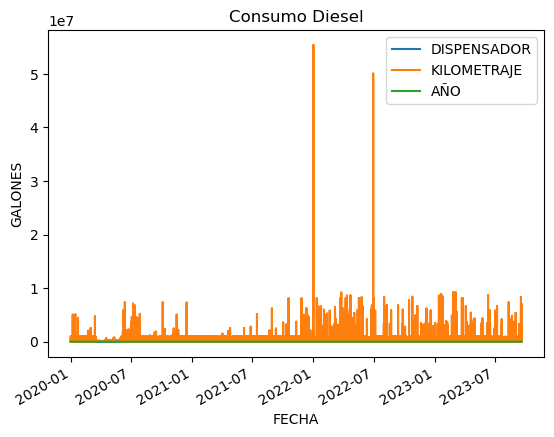

In [63]:
raw_diesel.plot(title= 'Consumo Diesel', xlabel= 'FECHA', ylabel='GALONES')

<Axes: title={'center': 'Consumo Diario'}, xlabel='FECHA', ylabel='GALONES'>

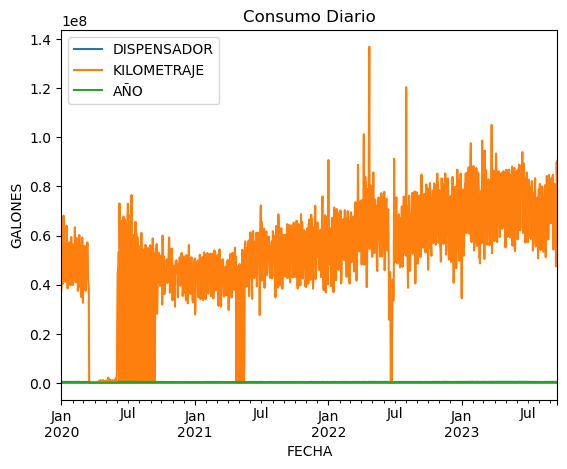

In [64]:
raw_diesel_diario = raw_diesel.resample('1D').sum()
raw_diesel_diario.plot(title = 'Consumo Diario', xlabel = 'FECHA', ylabel = 'GALONES')

<Axes: title={'center': 'Consumo Mensual'}, xlabel='FECHA', ylabel='GALONES'>

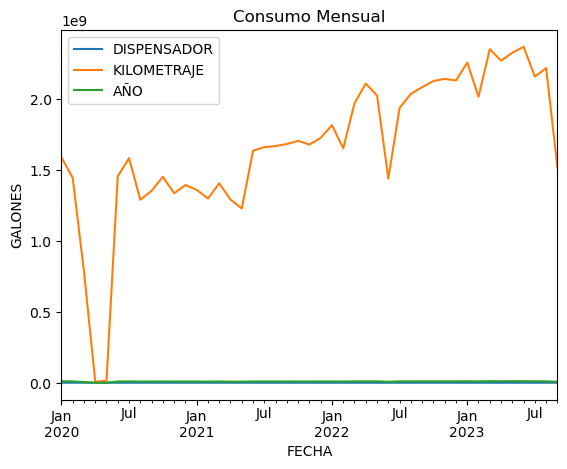

In [66]:
raw_diesel_mensual = raw_diesel.resample('1ME').sum()
raw_diesel_mensual.plot(title = 'Consumo Mensual', xlabel = 'FECHA', ylabel = 'GALONES')